Enter the path to the dataset CSV file: /content/creditcard[1].csv

Dataset preview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -

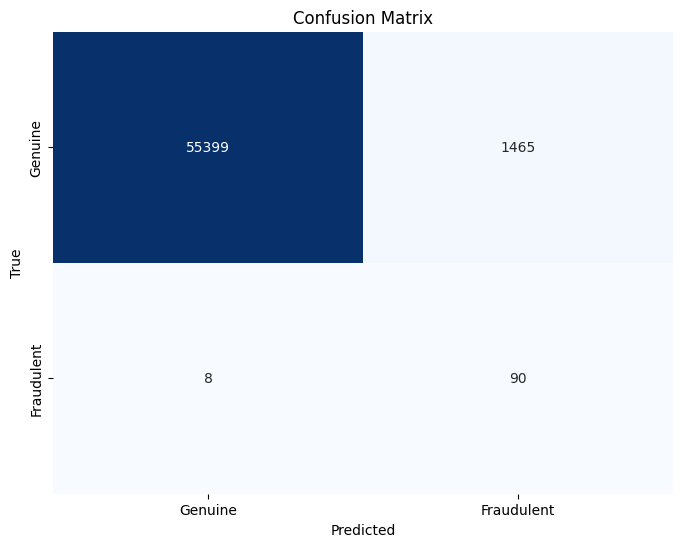

<ipython-input-1-19bc586ccd2a>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data, palette='Set2')


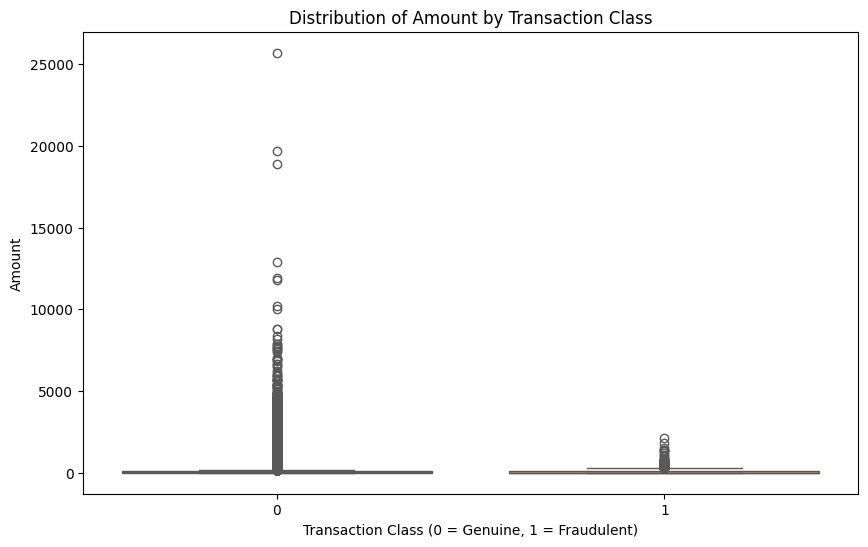

<ipython-input-1-19bc586ccd2a>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set1')


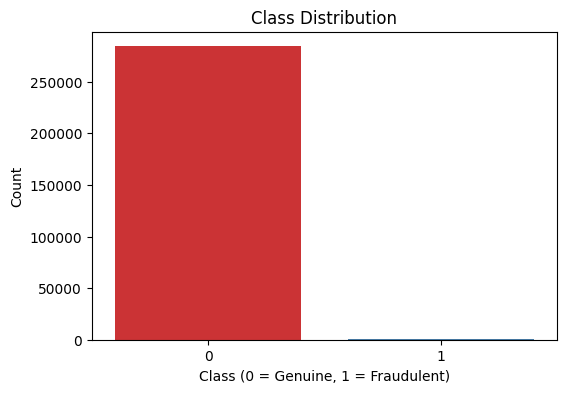

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Read CSV data from the user input
file_path = input("Enter the path to the dataset CSV file: ")
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("\nDataset preview:")
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Feature selection: Define input features and target variable
X = data.drop('Class', axis=1)  # Features (excluding 'Class')
y = data['Class']  # Target variable ('Class')

# Data normalization (scaling features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model: Let's try Logistic Regression and Random Forest
model_choice = input("Choose a model (1 for Logistic Regression, 2 for Random Forest): ")

if model_choice == '1':
    model = LogisticRegression(random_state=42)
elif model_choice == '2':
    model = RandomForestClassifier(random_state=42)
else:
    print("Invalid choice, defaulting to Logistic Regression.")
    model = LogisticRegression(random_state=42)

# Train the selected model
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation: Precision, Recall, F1-score, and Confusion Matrix
print("\nModel Evaluation (Classification Report):")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Genuine', 'Fraudulent'], yticklabels=['Genuine', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Additional Visualizations: Distribution of 'Amount' by transaction class (Fraud vs. Genuine)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data, palette='Set2')
plt.title('Distribution of Amount by Transaction Class')
plt.xlabel('Transaction Class (0 = Genuine, 1 = Fraudulent)')
plt.ylabel('Amount')
plt.show()

# Class imbalance visualization (Distribution of 'Class')
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Class (0 = Genuine, 1 = Fraudulent)')
plt.ylabel('Count')
plt.show()
